# General Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import OrderedDict


from lapd_codes.crime_codes import crime_codes
from lapd_codes.mo_codes import mo_codes

## Retreive Data From LA City's API

In [2]:
max_rows = 2000000
url = 'https://data.lacity.org/resource/7fvc-faax.csv?$limit=' + str(max_rows)
df = pd.read_csv(url)

In [3]:
print(len(df))

1692056


## Column Titles

In [85]:
list(df)

['area_id',
 'area_name',
 'crm_cd',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',
 'crm_cd_desc',
 'cross_street',
 'date_occ',
 'date_rptd',
 'dr_no',
 'location',
 'location_1',
 'location_1_address',
 'location_1_city',
 'location_1_state',
 'location_1_zip',
 'mocodes',
 'premis_cd',
 'premis_desc',
 'rpt_dist_no',
 'status',
 'status_desc',
 'time_occ',
 'vict_age',
 'vict_descent',
 'vict_sex',
 'weapon_desc',
 'weapon_used_cd']

## Analysis

In [5]:
df.describe()

,area_id,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,dr_no,location_1_address,location_1_city,location_1_state,location_1_zip,premis_cd,rpt_dist_no,time_occ,vict_age,weapon_used_cd
count,1.692056e+06,1.692056e+06,1.692049e+06,107259.000000,2416.000000,78.000000,1.692056e+06,0.0,0.0,0.0,0.0,1.691962e+06,1.692056e+06,1.692056e+06,1.555986e+06,560477.000000
mean,1.114240e+01,5.068188e+02,5.066915e+02,953.224252,970.411838,969.858974,1.382536e+08,NaN,NaN,NaN,NaN,3.119703e+02,1.160617e+03,1.363566e+03,3.596611e+01,370.664903
std,5.992831e+00,2.104984e+02,2.104086e+02,124.632579,88.645027,92.286640,2.381712e+07,NaN,NaN,NaN,NaN,2.104935e+02,5.992782e+02,6.466657e+02,1.681065e+01,113.900833
min,1.000000e+00,1.100000e+02,1.100000e+02,210.000000,93.000000,421.000000,2.100000e+02,NaN,NaN,NaN,NaN,1.010000e+02,1.000000e+02,1.000000e+00,1.000000e+01,101.000000
25%,6.000000e+00,3.300000e+02,3.300000e+02,998.000000,998.000000,998.000000,1.203192e+08,NaN,NaN,NaN,NaN,1.020000e+02,6.450000e+02,9.300000e+02,2.300000e+01,400.000000
50%,1.200000e+01,4.400000e+02,4.400000e+02,998.000000,998.000000,998.000000,1.407080e+08,NaN,NaN,NaN,NaN,2.100000e+02,1.204000e+03,1.430000e+03,3.400000e+01,400.000000
75%,1.600000e+01,6.260000e+02,6.260000e+02,998.000000,998.000000,998.000000,1.607141e+08,NaN,NaN,NaN,NaN,5.010000e+02,1.675000e+03,1.900000e+03,4.800000e+01,400.000000
max,2.100000e+01,9.560000e+02,9.990000e+02,999.000000,999.000000,999.000000,9.102204e+08,NaN,NaN,NaN,NaN,9.710000e+02,2.198000e+03,2.359000e+03,9.900000e+01,516.000000


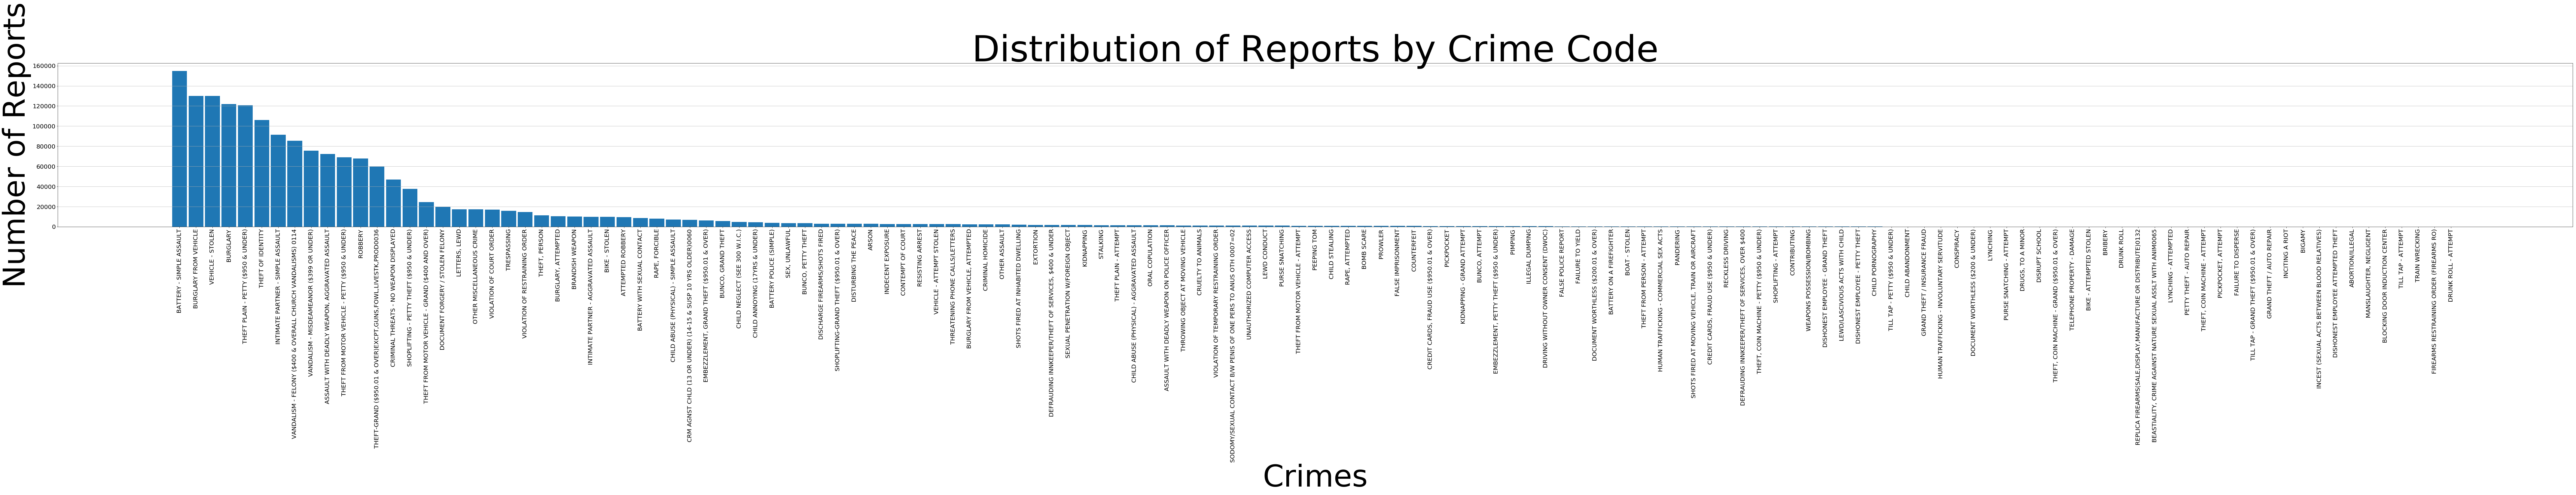

In [4]:
crime_dist = {}

# Translated Crime Code numbers to crime descriptions
def code_to_string(code):
    if str(code) in crime_codes.keys():
        return crime_codes[str(code)]
    else:
        print('Error: crime code ' + str(code) + 'isn\'t in lapd_codes/crime_codes')

# Count every crime's primary crime code
for crime_code in df['crm_cd']:
    if code_to_string(crime_code) in crime_dist.keys():
        crime_dist[code_to_string(crime_code)] += 1
    else:
        crime_dist[code_to_string(crime_code)] = 1

# Sort crime based on most recorded instances
crime_dist = OrderedDict(sorted(crime_dist.items(), key=lambda t: t[1], reverse=True))

# Resize plot
plt.figure(figsize=(150,10))

# Create bar plot of result values
plt.bar(range(len(crime_dist)), list(crime_dist.values()), align='center', width=0.9)

# Add titles to plot
plt.title('Distribution of Reports by Crime Code', fontdict={'fontsize': 120})
plt.xlabel('Crimes', fontdict={'fontsize': 100})
plt.ylabel('Number of Reports', fontdict={'fontsize': 100})

# Give xticks proper labels and rotation
plt.xticks(range(len(crime_dist)), list(crime_dist.keys()), rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

# Add horizontal grid lines
plt.grid(axis='y')

# Show plot
plt.show()

## Time Distribution Functions

In [82]:
successful_prop_crimes = [330, 310, 442, 440, 350, 668, 354, 341, 420, 331, 664, 343, 662, 951, 474, 345, 444, 670, 473, 470, 347, 446, 349, 445, 648, 740, 745]
attempted_prop_crimes = [410, 320, 450, 421, 441, 950, 475, 443]
all_prop_crimes = successful_prop_crimes + attempted_prop_crimes

In [83]:
def crime_time_distribution(time_distribution, crime_code=None, year=None, month=None, day=None):
    """
    Creates a time distribution based on the time_distribution parameter.
    Output is passed to bar_graph which graphs the distribution calculated.
    
    Parameters:
    time_distribution = String: 'day', 'month', or 'year'
    crime_code = Integer: crime code
    year = Integer: year number
    month = Integer: 0-11 representing Janurary - December
    day = Integer: 0-6 representing Monday - Sunday
    """
    if not (time_distribution == 'day' or time_distribution == 'month' or time_distribution == 'year'):
        raise ValueError('time_distribution must have the value "day", "month", or "year".')
    
    # Get all crime reports for a specific crime code
    if crime_code:
        if type(crime_code) is str:
            crime_code = int(crime_code)
        
        if type(crime_code) is int:
            crime_data = df.loc[df['crm_cd'] == crime_code]
            crime_title = '"' + crime_codes[str(crime_code)] + '"'
        elif type(crime_code) is list:
            crime_data = df.loc[df['crm_cd'].isin(crime_code)]
            crime_title = '"Crime Category"'
    else:
        crime_data = df
        crime_title = 'All Crime'
    
    # Count number of crimes per time value
    distribution_data = {}

    for date in crime_data['date_occ']:
        time = datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%f')
        time_value = None
        
        if time_distribution == 'day':
            time_value = int(time.weekday())
        elif time_distribution == 'month':
            time_value = int(time.month)
        elif time_distribution == 'year':
            time_value = int(time.year)
        
        if (not year or time.year == year) and (not month or time.month == month) and (not day or time.day == day):
            if time_value in distribution_data.keys():
                distribution_data[time_value] += 1
            else:
                distribution_data[time_value] = 1
    
    # Sort results dictionary based on keys
    sorted_values = [distribution_data[key] for key in sorted(distribution_data)]
    
    # Determine label for the x-axis
    if time_distribution == 'day':
        title = 'Distribution of ' + crime_title + ' Reports by Day'
        x_title = 'Days'
        x_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    elif time_distribution == 'month':
        title = 'Distribution of ' + crime_title + ' Reports by Month'
        x_title = 'Months'
        x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    elif time_distribution == 'year':
        title = 'Distribution of ' + crime_title + ' Reports by Year'
        x_title = 'Years'
        x_labels = sorted(distribution_data.keys())
    
    bar_graph(sorted_values, title, x_title, x_labels)

In [84]:
def bar_graph(df, title, x_title, x_labels):
    # Resize plot
    plt.figure(figsize=(20,10))
    
    # Create bar plot of result values
    plt.bar(range(len(df)), df, align='center', width=0.9)
    
    # Add titles to plot
    plt.title(title, fontdict={'fontsize': 30})
    plt.xlabel(x_title, fontdict={'fontsize': 25})
    plt.ylabel('Number of Reports', fontdict={'fontsize': 25})
    
    # Give xticks and yticks proper labels and rotation
    plt.xticks(range(len(df)), x_labels, rotation=0)
    plt.tick_params(axis='x', which='major', labelsize=20)
    plt.tick_params(axis='y', which='major', labelsize=20)
    
    # Add horizontal grid lines
    plt.grid(axis='y')

    # Show plot
    plt.show()

## Crime Distributions by Month

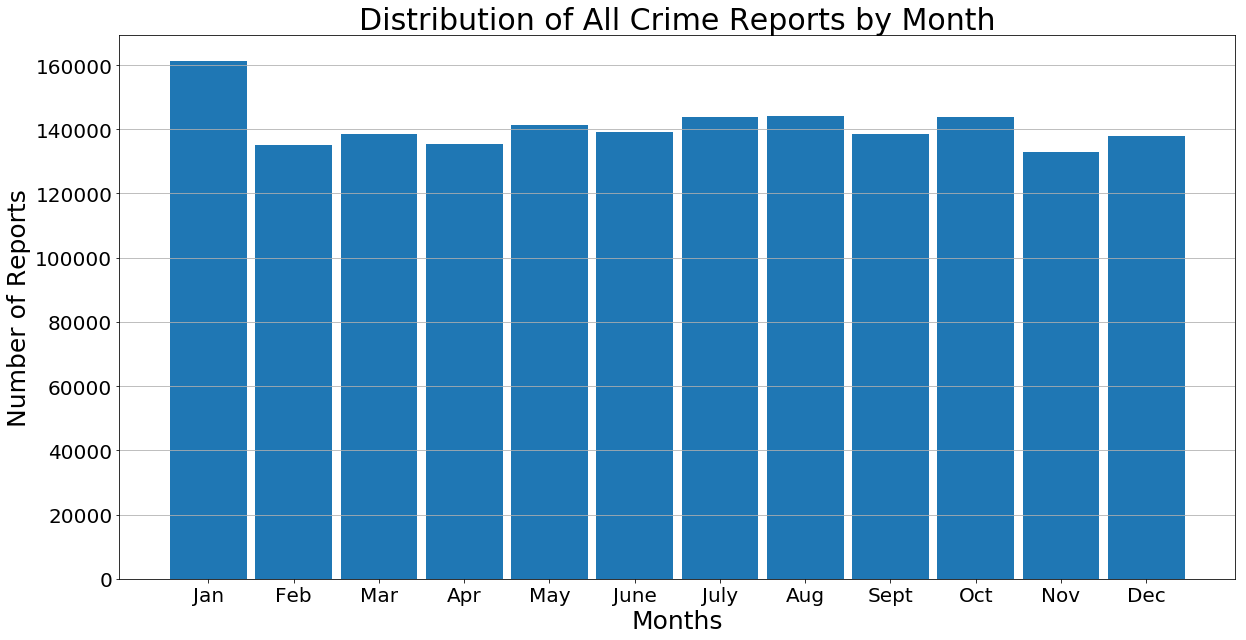

In [8]:
crime_time_distribution('month')

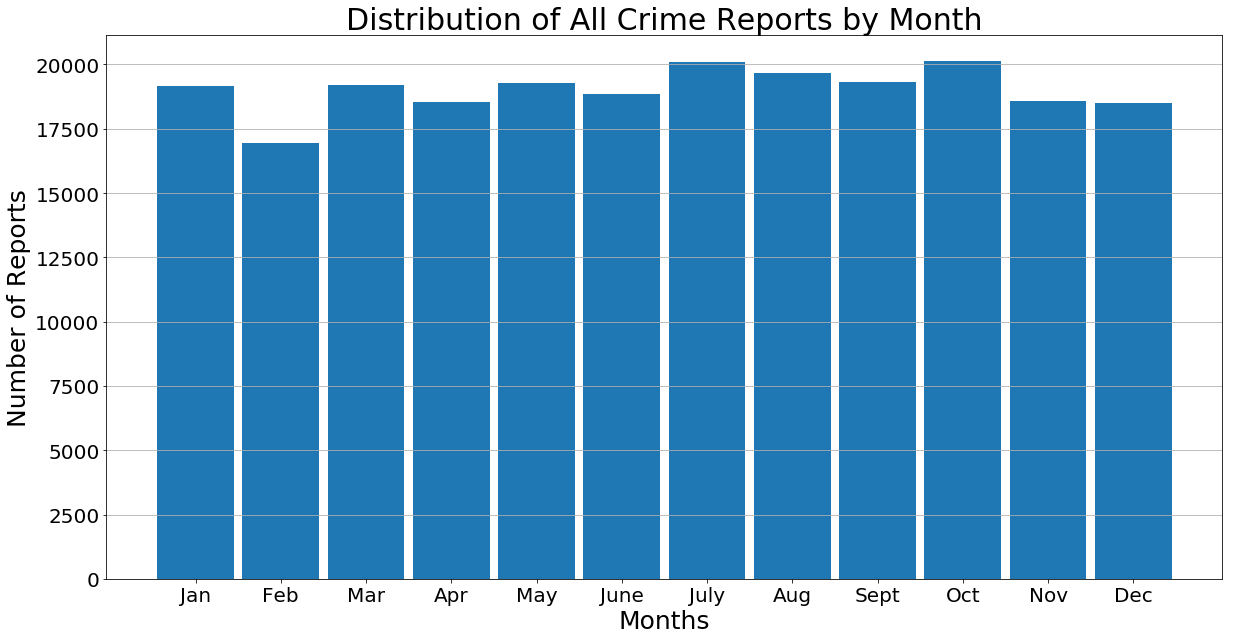

In [9]:
crime_time_distribution('month', year=2017)

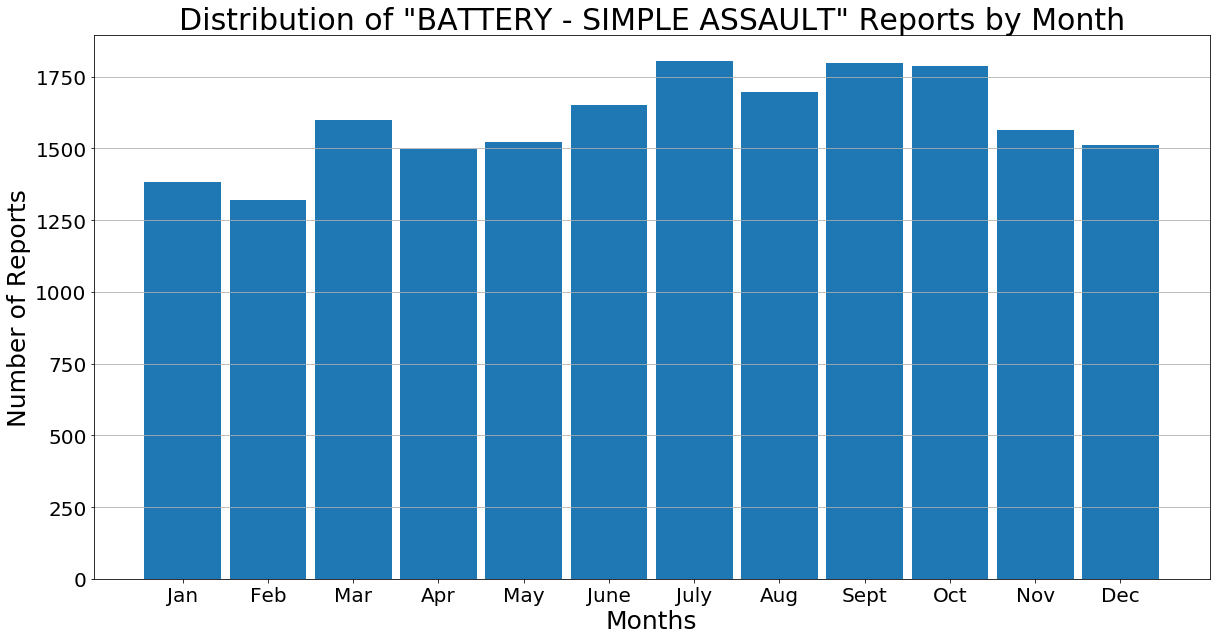

In [25]:
crime_time_distribution('month', 624, year=2017)

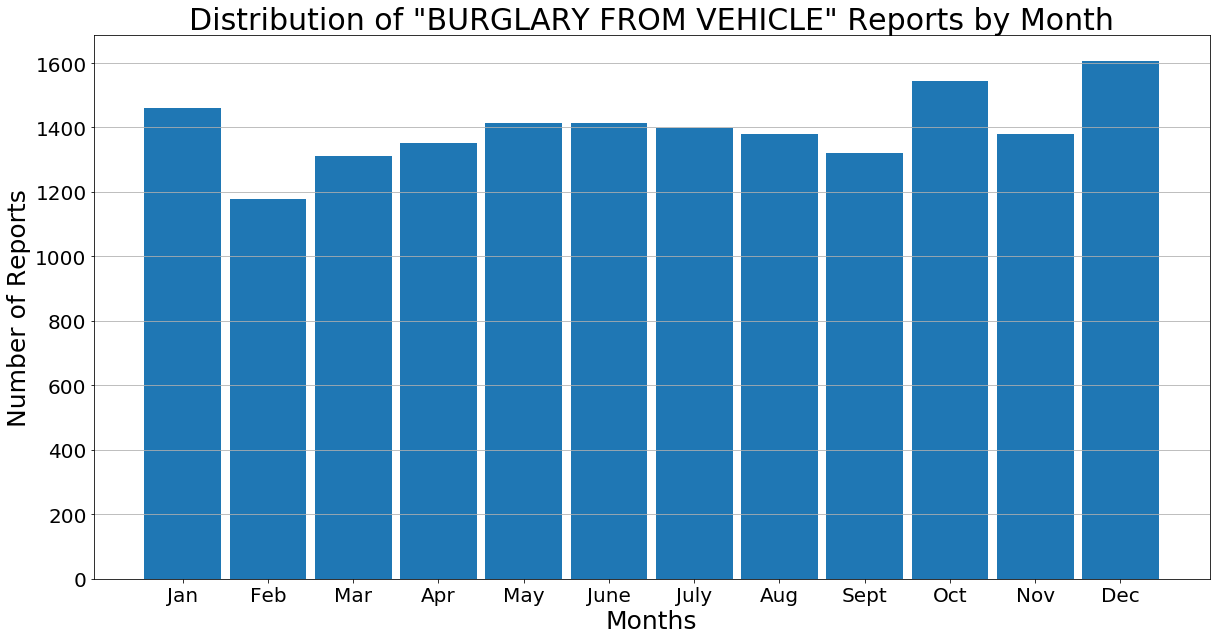

In [26]:
crime_time_distribution('month', 330, year=2016)

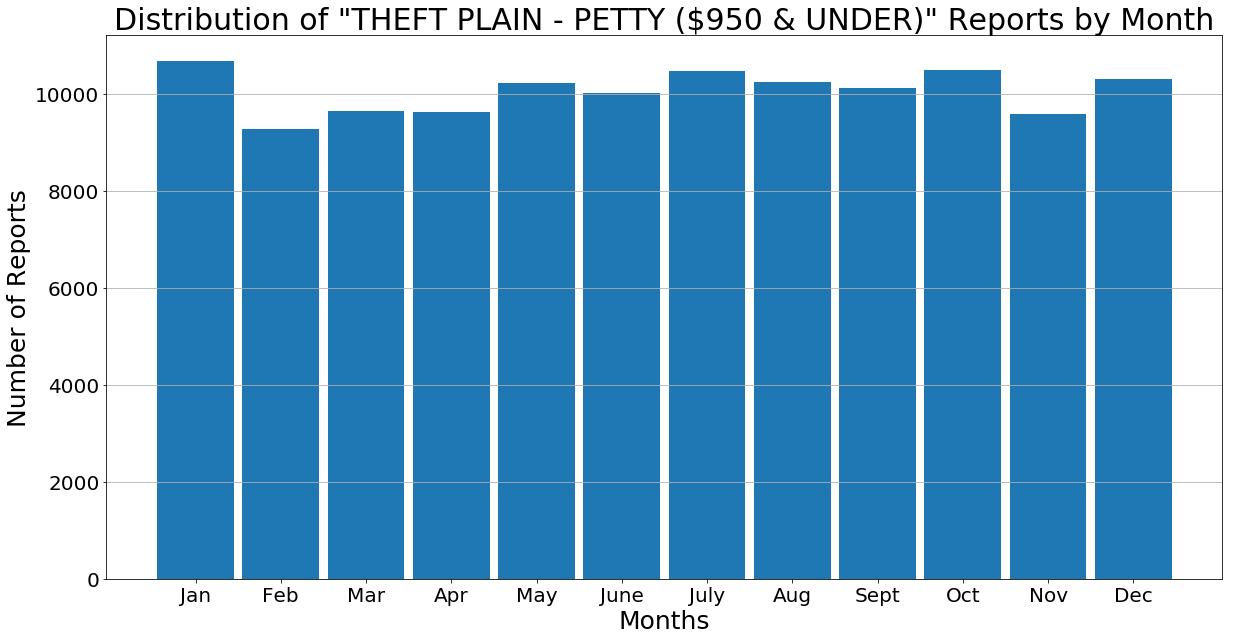

In [12]:
crime_time_distribution('month', 440)

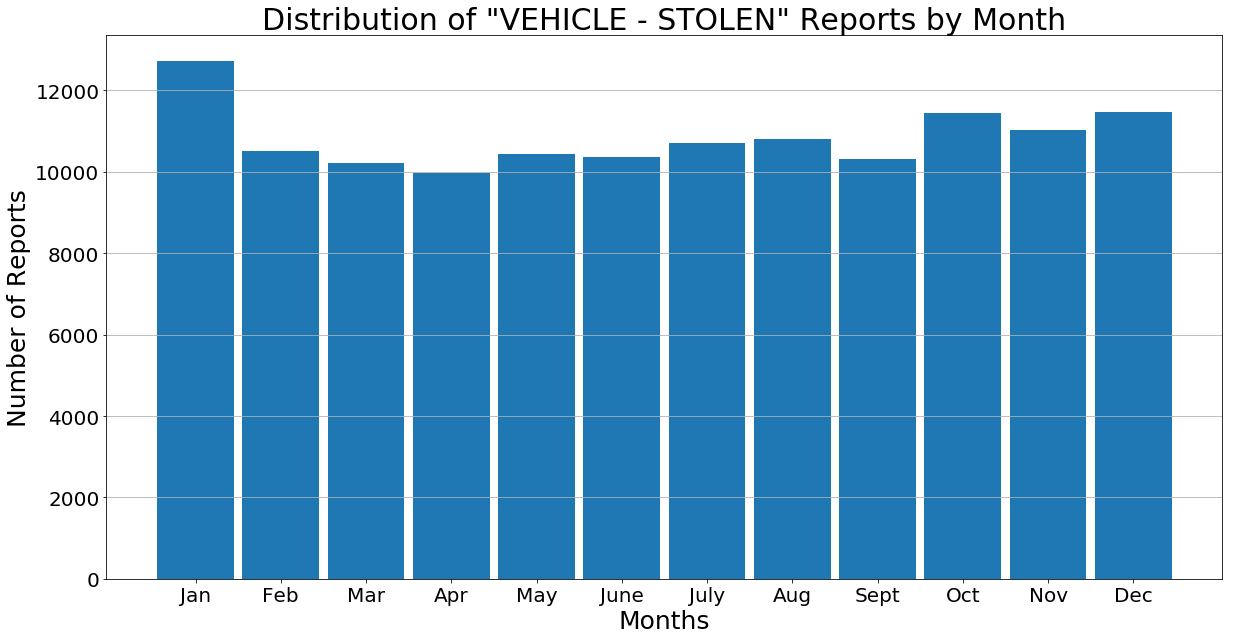

In [13]:
crime_time_distribution('month', 510)

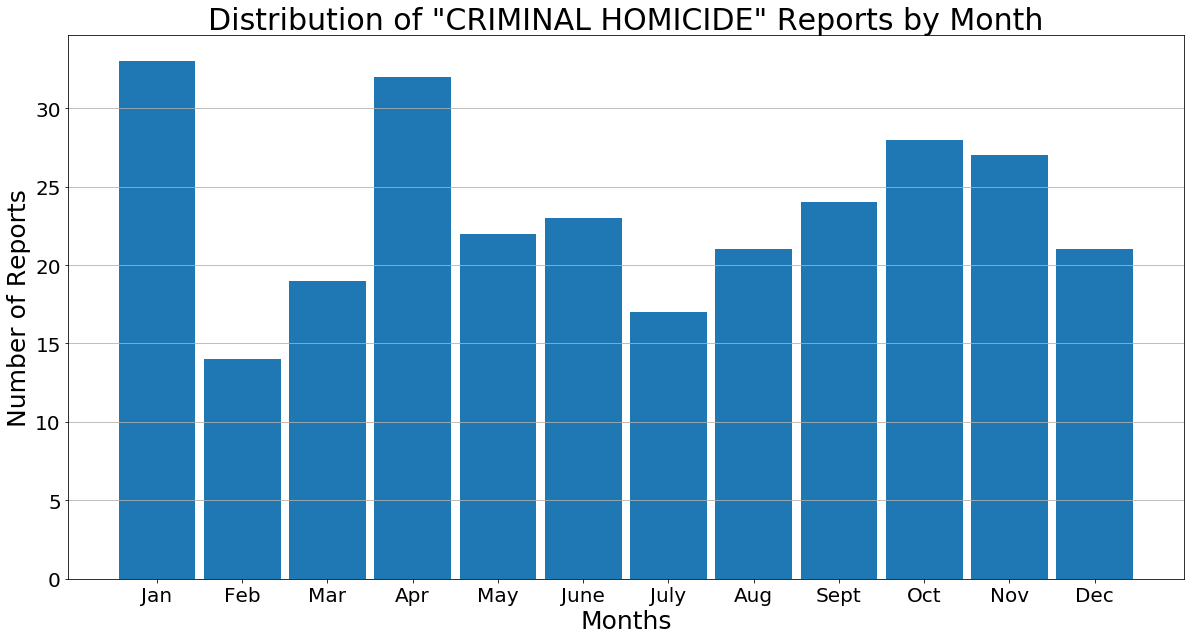

In [30]:
crime_time_distribution('month', 110, year=2017)

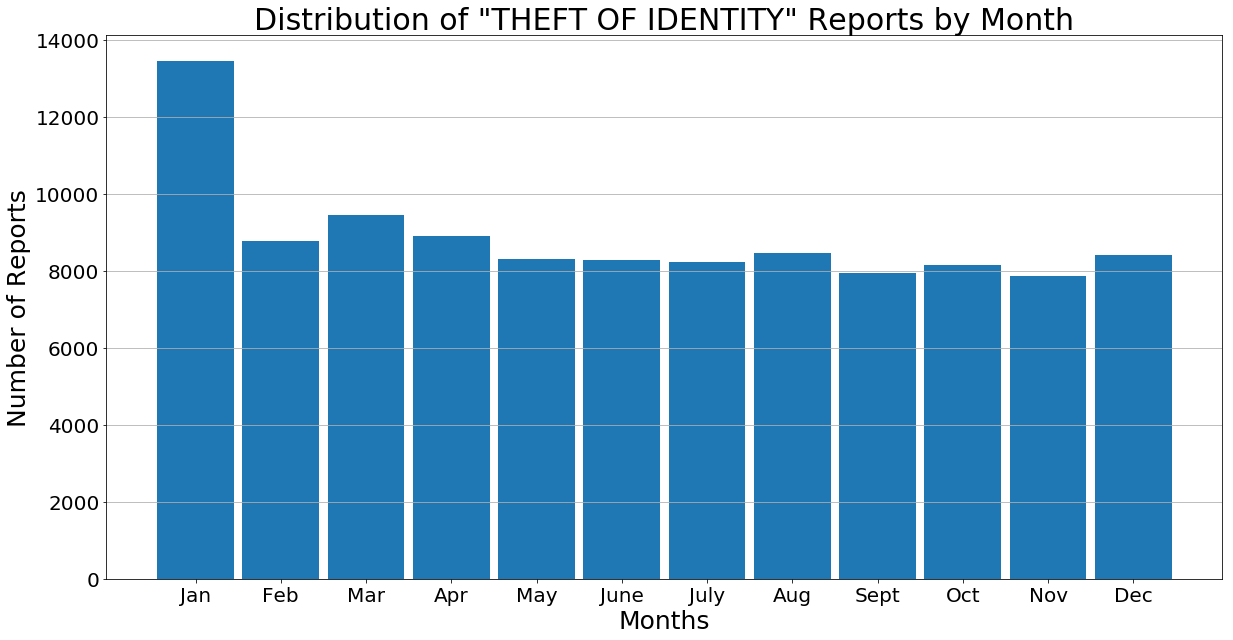

In [15]:
crime_time_distribution('month', 354)

## Crime Distributions by Day of the Week

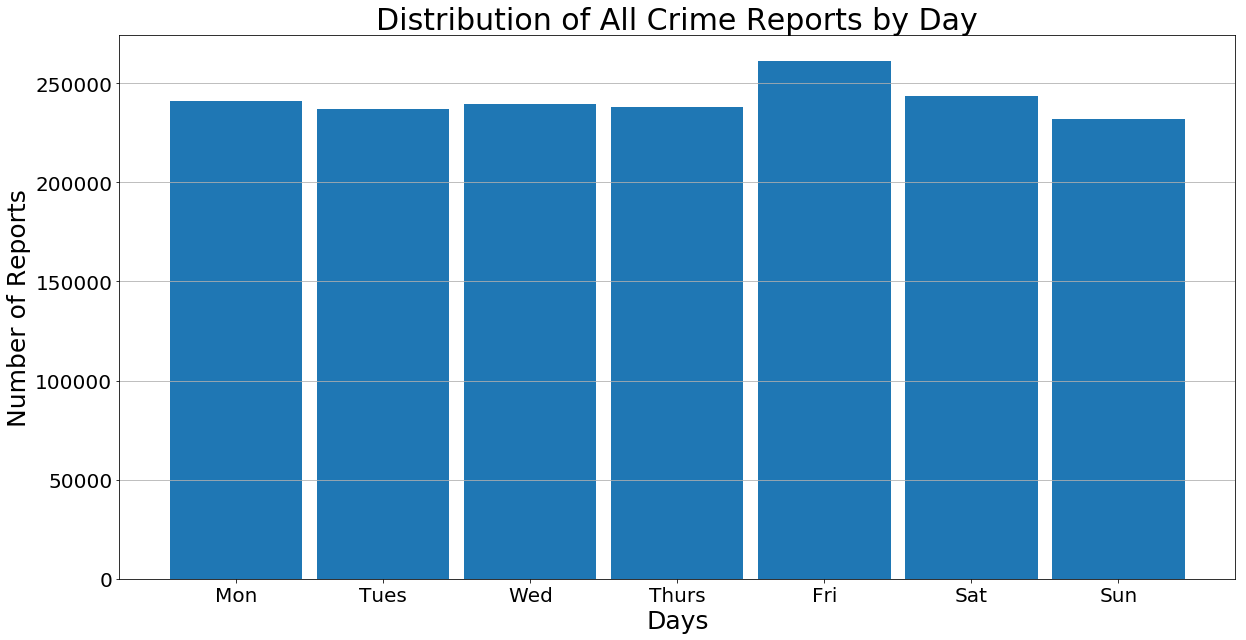

In [16]:
crime_time_distribution('day')

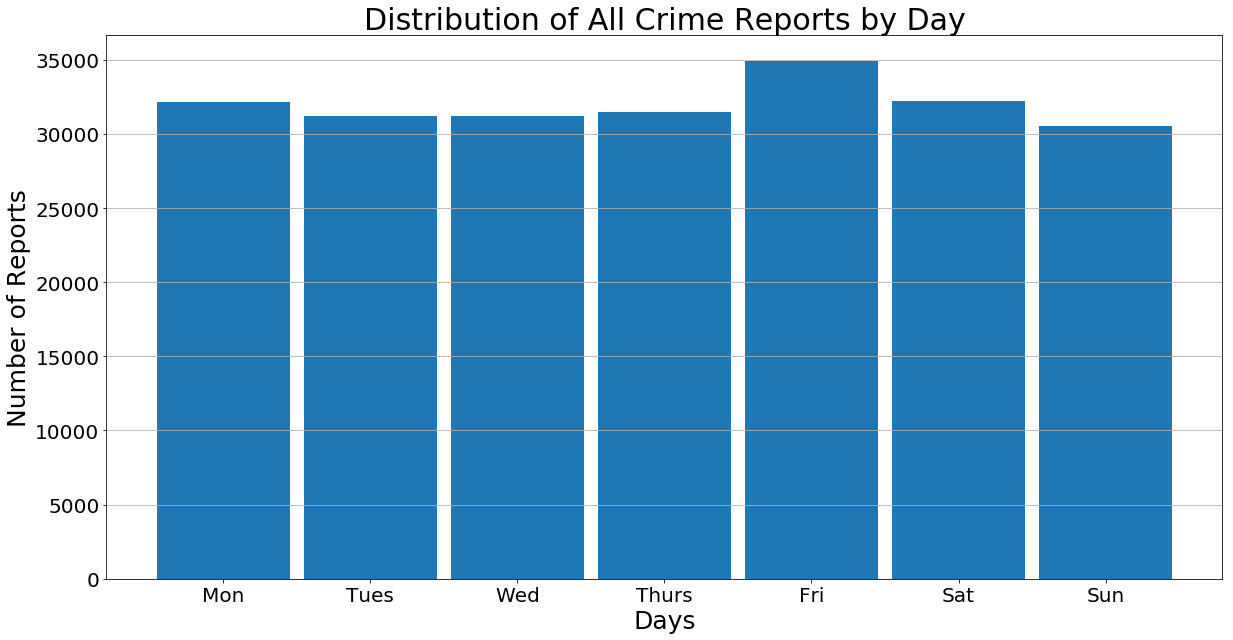

In [31]:
crime_time_distribution('day', year=2016)

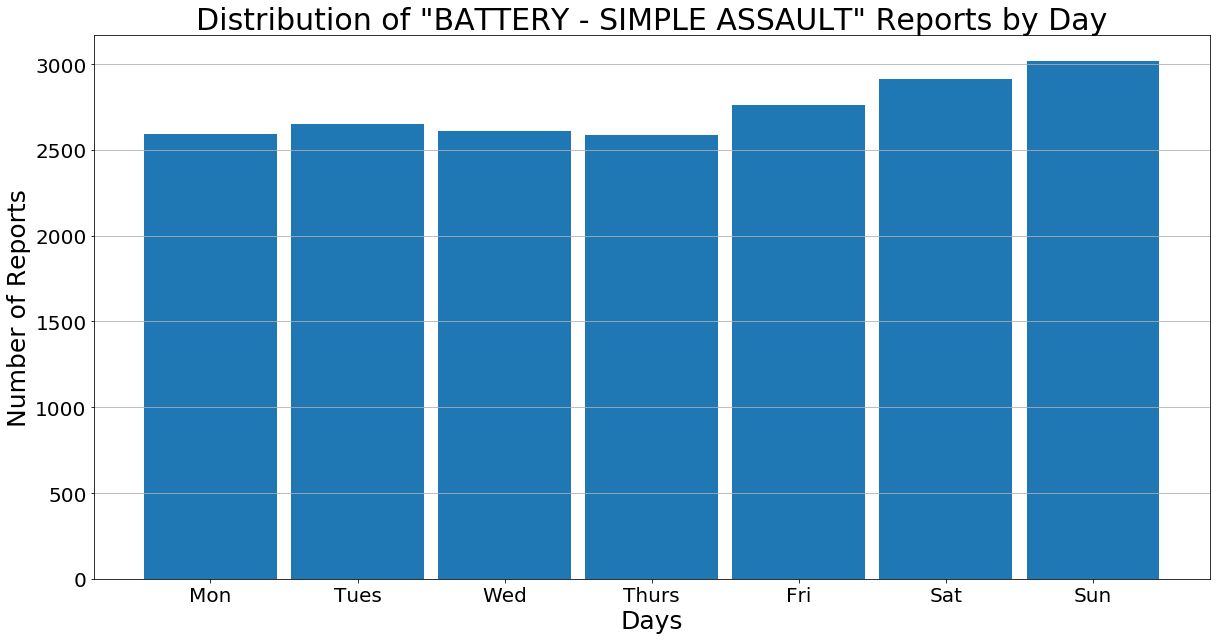

In [32]:
crime_time_distribution('day', 624, year=2017)

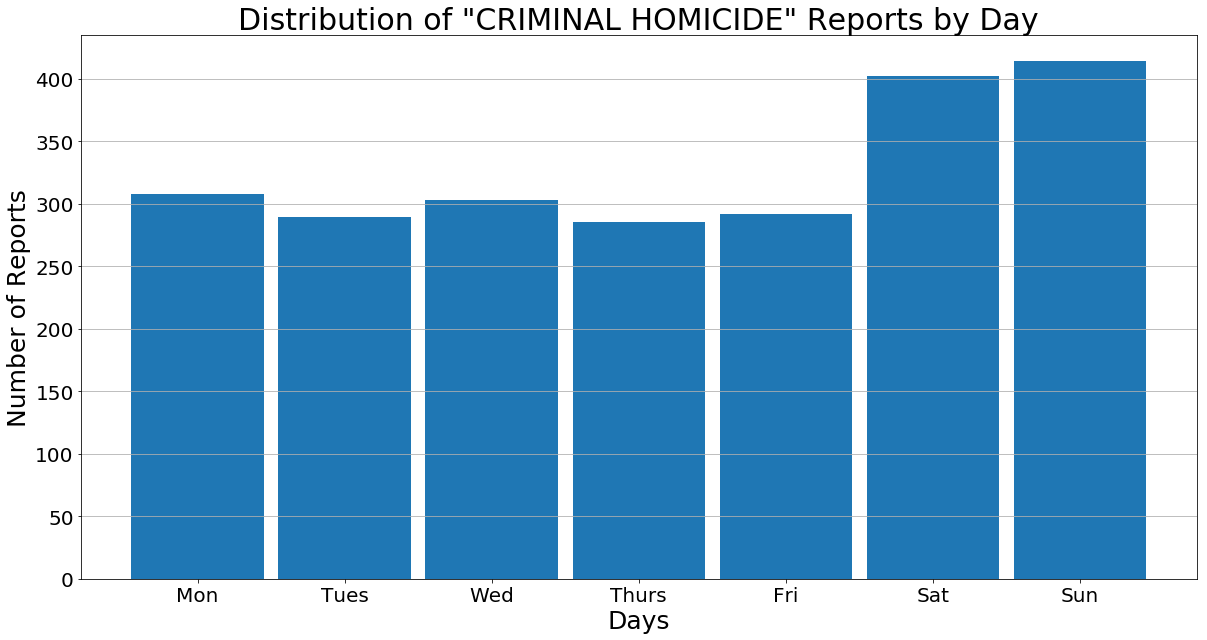

In [19]:
crime_time_distribution('day',110)

## Crime Distributions by Year

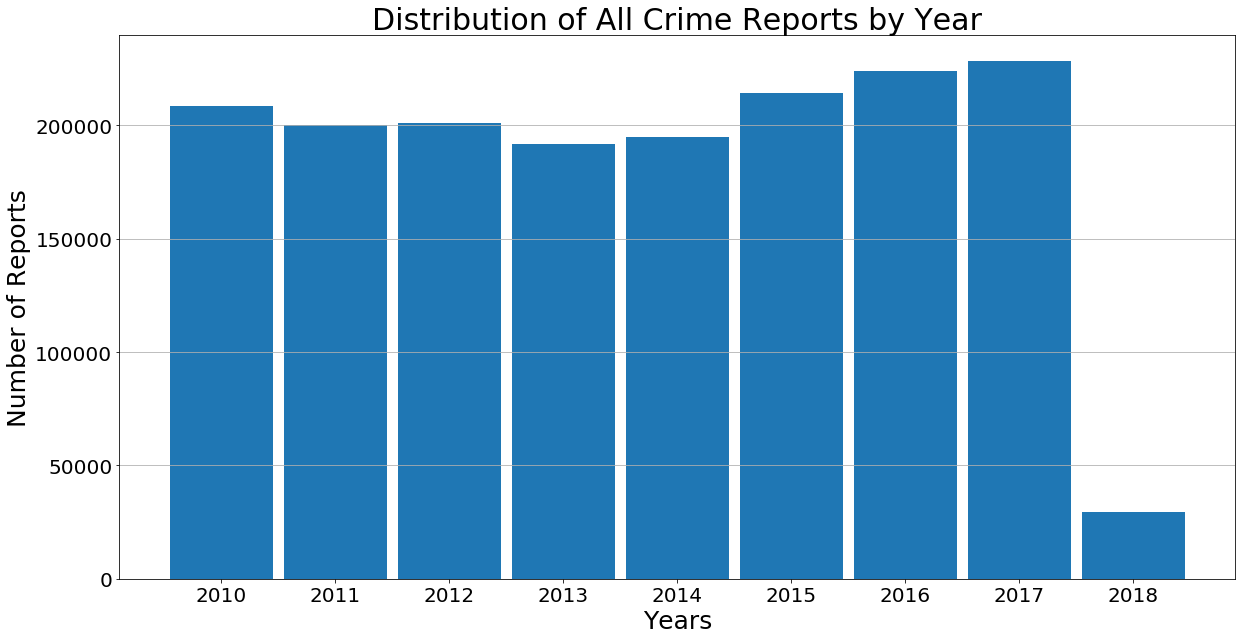

In [20]:
crime_time_distribution('year')

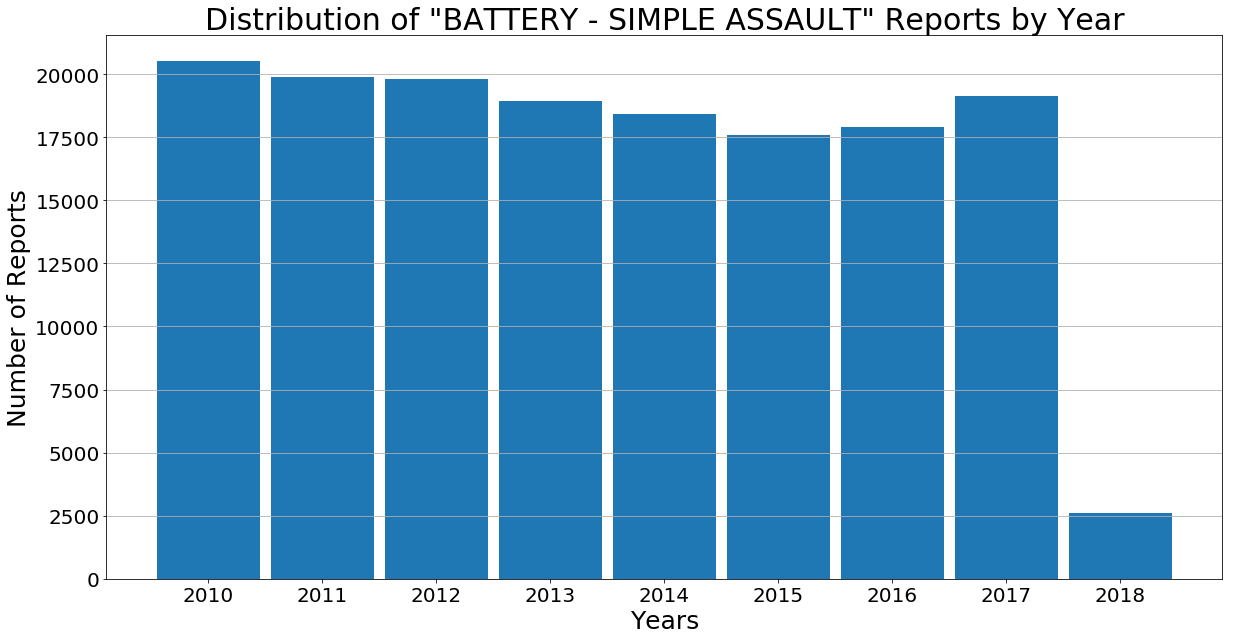

In [34]:
crime_time_distribution('year', 624)

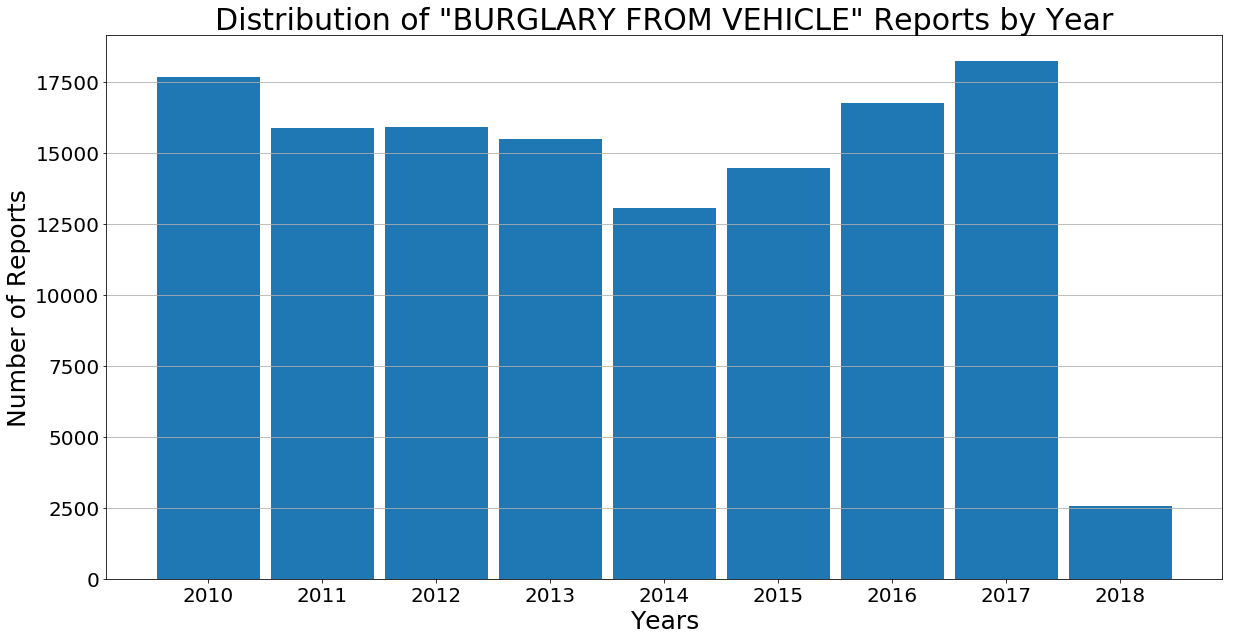

In [22]:
crime_time_distribution('year', 330)

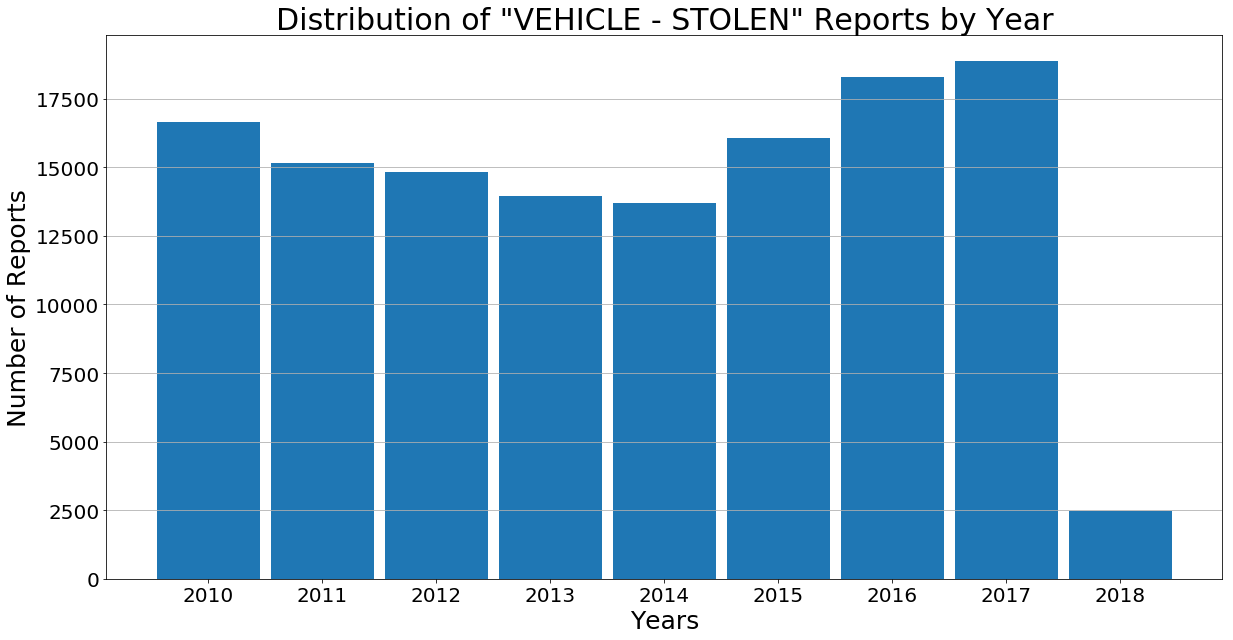

In [23]:
crime_time_distribution('year', 510)

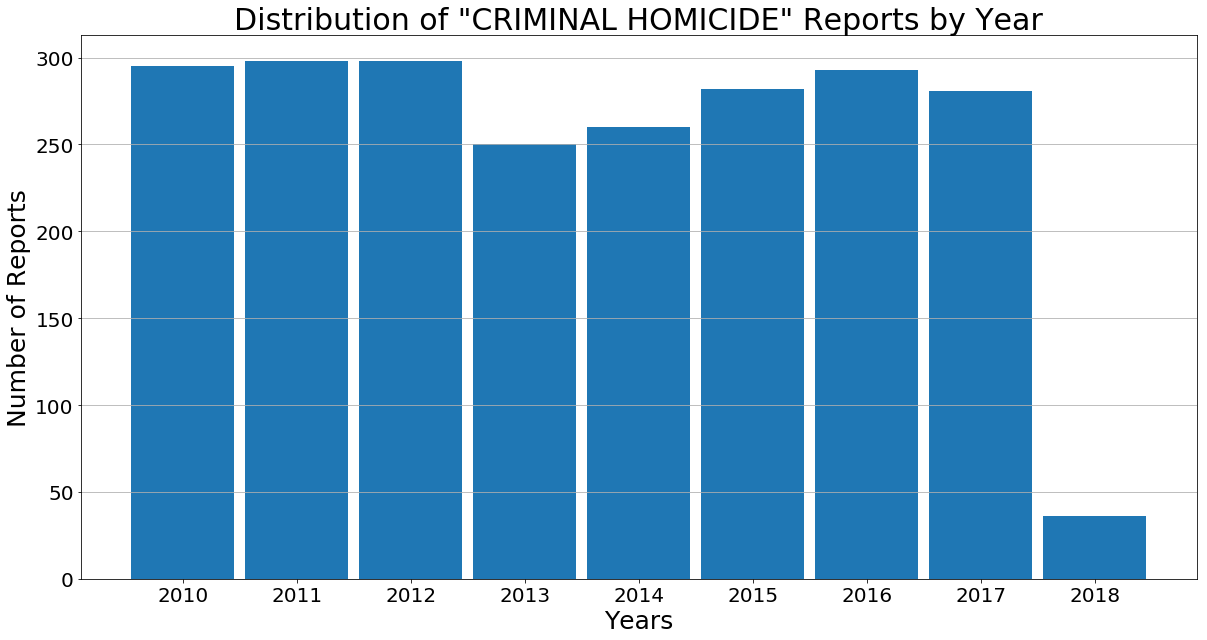

In [24]:
crime_time_distribution('year', 110)

## Crime Category Distributions

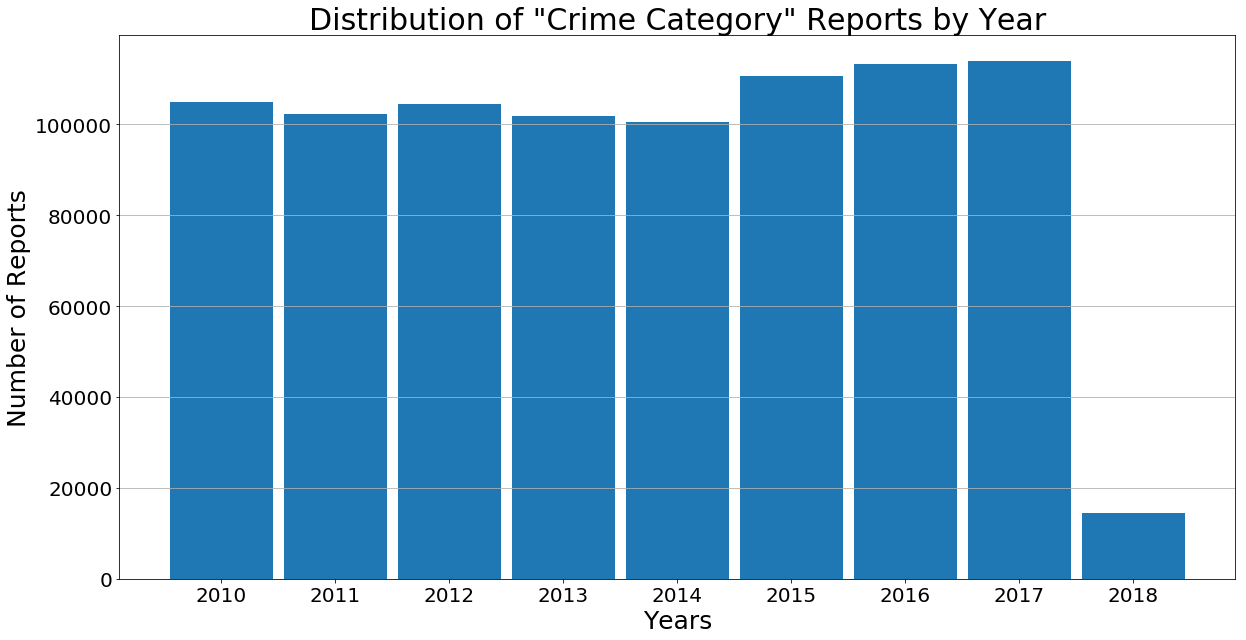

In [87]:
crime_time_distribution('year', successful_prop_crimes)

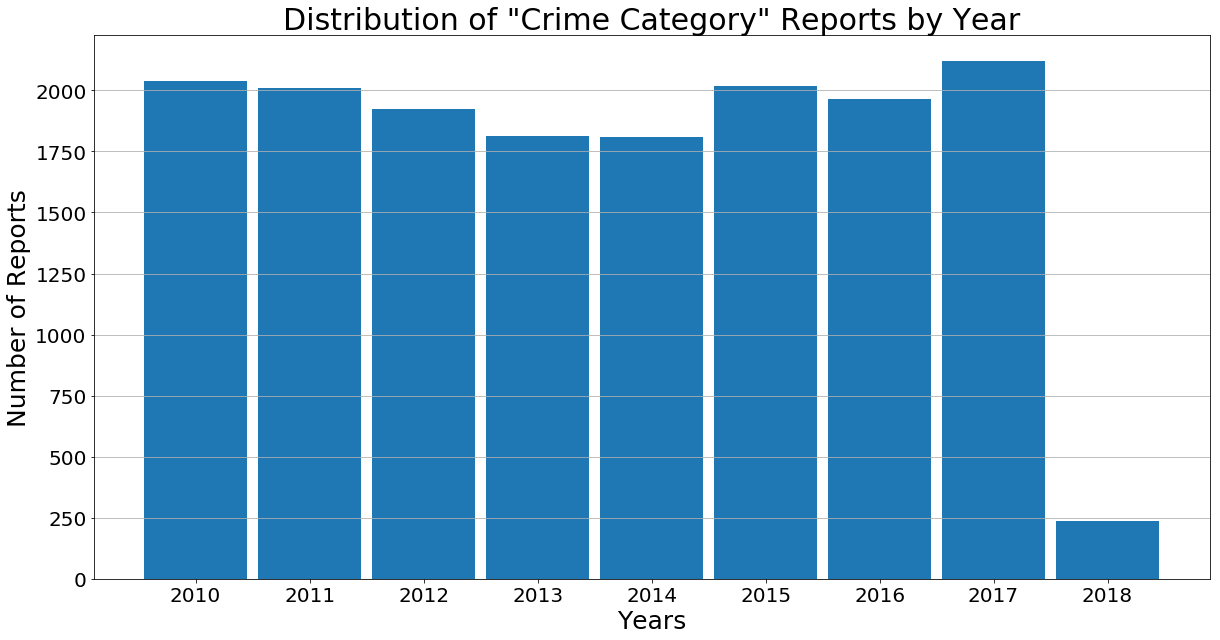

In [89]:
crime_time_distribution('year', attempted_prop_crimes)

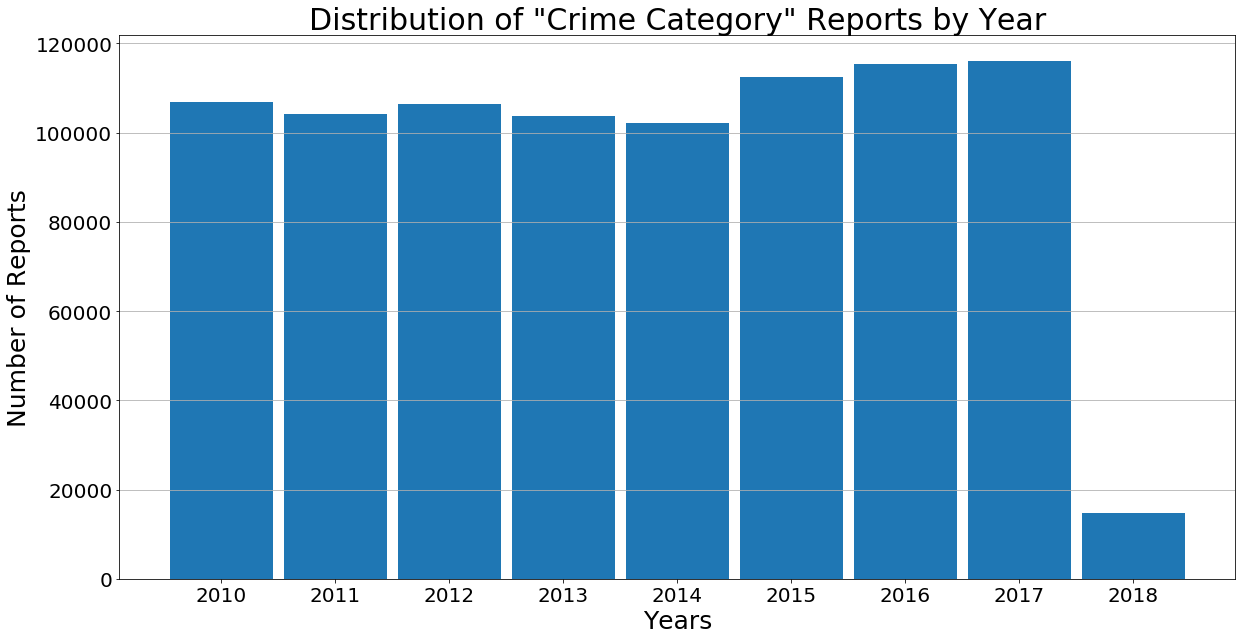

In [88]:
crime_time_distribution('year', all_prop_crimes)